In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
pd.options.display.max_columns = 999
import dataframe_image as dfi

In [2]:
# check contents of data folder
os.listdir('../data')

['.ipynb_checkpoints',
 'all_text_chp_incidents_month_2022_01.csv',
 'all_text_chp_incidents_month_2022_02.csv',
 'all_text_chp_incidents_month_2022_03.csv',
 'all_text_chp_incidents_month_2022_04.csv',
 'all_text_chp_incident_day_2022_05_01.csv',
 'all_text_chp_incident_day_2022_05_02.csv',
 'all_text_chp_incident_day_2022_05_03.csv',
 'Census Population.csv',
 'CHP - Data Dictionary.csv',
 'CHP Area DMA Mapping.csv',
 'CHP_Headers.csv',
 'combined_chp_data.csv',
 'combined_chp_data.xlsx',
 'combined_chp_data33.xls',
 'combined_chp_data44.xlsx']

In [3]:
# separate daily and monthly data file names into respective lists

daily_data = ['all_text_chp_incident_day_2022_05_01.csv',
 'all_text_chp_incident_day_2022_05_02.csv',
 'all_text_chp_incident_day_2022_05_03.csv']

monthly_data = ['all_text_chp_incidents_month_2022_01.csv',
 'all_text_chp_incidents_month_2022_02.csv',
 'all_text_chp_incidents_month_2022_03.csv',
 'all_text_chp_incidents_month_2022_04.csv']

#### Headers

In [4]:
# read in headers
df_headers = pd.read_csv('../data/CHP_Headers.csv', header = None)

# turn headers into a Series
header_series = df_headers.iloc[0]

#### Merge Daily & Monthly Data

In [5]:
# create function to read in files, add headers, and merge into a single DataFrame

def merge_files(file_names):
    dfs = []
    for file in file_names:
        # read in file
        df = pd.read_csv(f'../data/{file}', low_memory=False)

        # set headers 
        df.columns = header_series

        # print shape of dataframe
        print(f'{file} shape is {df.shape}')

        # add df to list, preparing to merge
        dfs.append(df)
        
    df_merged = pd.concat(dfs)
    print(f'merged dataframe shape is {df_merged.shape}')
    return df_merged

In [6]:
df_daily = merge_files(daily_data)

all_text_chp_incident_day_2022_05_01.csv shape is (1148, 20)
all_text_chp_incident_day_2022_05_02.csv shape is (1373, 20)
all_text_chp_incident_day_2022_05_03.csv shape is (1366, 20)
merged dataframe shape is (3887, 20)


In [7]:
df_daily.head()

,Incident ID,CC Code,Incident Number,Timestamp,Description,Location,Area,Zoom Map,TB XY,Latitude,Longitute,District,County FIPS ID,City FIPS ID,Freeway Number,Freeway Direction,State Post Mile,Absolute Post Mile,Severity,Duration
0,20891320,LAHB,220501,05/01/2022 00:03:00,1125-Traffic Hazard,Us101 S / N Benton Way,Central LA,NaN,NaN,34.075077,-118.274297,7.0,37.0,44000.0,101,S,3.352,4.7,NaN,11.0
1,20891323,INHB,220501,05/01/2022 00:02:00,1125-Traffic Hazard,I10 E Wo / Hargrave St Ic,San Gorgonio Pass,NaN,NaN,33.924591,-116.871996,8.0,65.0,3820.0,10,E,13.627,99.5,NaN,7.0
2,20891324,INHB,220501,05/01/2022 00:00:00,WW-Wrong Way Driver,Sr94 W / 25th St Ofr,San Diego,NaN,NaN,32.713277,-117.137249,11.0,73.0,66000.0,94,W,2.016,0.6,NaN,0.0
3,20891326,GGHB,220501,05/01/2022 00:04:00,1125-Traffic Hazard,I580 E / Fruitvale Ave Ofr,Oakland,NaN,NaN,37.799104,-122.220888,4.0,1.0,53000.0,580,E,R41.57,57.8,NaN,10.0
4,20891328,LAHB,220501,05/01/2022 00:06:00,1125-Traffic Hazard,N Mission Rd Onr / Us101 N I10 E Con,Central LA,NaN,NaN,34.052840,-118.223155,7.0,37.0,44000.0,101,N,S1.3,1.3,NaN,2.0


In [8]:
df_monthly = merge_files(monthly_data)

all_text_chp_incidents_month_2022_01.csv shape is (35872, 20)
all_text_chp_incidents_month_2022_02.csv shape is (36685, 20)
all_text_chp_incidents_month_2022_03.csv shape is (41507, 20)
all_text_chp_incidents_month_2022_04.csv shape is (40510, 20)
merged dataframe shape is (154574, 20)


In [9]:
df_monthly.head()

,Incident ID,CC Code,Incident Number,Timestamp,Description,Location,Area,Zoom Map,TB XY,Latitude,Longitute,District,County FIPS ID,City FIPS ID,Freeway Number,Freeway Direction,State Post Mile,Absolute Post Mile,Severity,Duration
0,20660606,INHB,220101.0,01/01/2022 00:04:00,WW-Wrong Way Driver,Sr241 S / Windy Ridge Toll Plaza,Santa Ana,NaN,NaN,33.824678,-117.716743,12.0,59.0,NaN,241.0,S,35.845,21.300,NaN,4.0
1,20660620,INHB,220101.0,01/01/2022 00:17:00,20002-Hit and Run No Injuries,I5 S / Kettner St Ofr,San Diego,NaN,NaN,32.743392,-117.184624,11.0,73.0,66000.0,5.0,S,R18.409,18.300,NaN,58.0
2,20660622,GGHB,220101.0,01/01/2022 00:21:00,1183-Trfc Collision-Unkn Inj,Sr87 N / Taylor St Ofr,San Jose,NaN,NaN,37.342700,-121.901165,4.0,85.0,68000.0,87.0,N,6.559,6.575,NaN,26.0
3,20660628,LAHB,220101.0,01/01/2022 00:15:00,1179-Trfc Collision-1141 Enrt,Sr90 W / Mindanao Way,West LA,NaN,NaN,33.983808,-118.437711,7.0,37.0,44000.0,90.0,W,1.221,0.300,NaN,5.0
4,20660629,INHB,220101.0,01/01/2022 00:21:00,1125-Traffic Hazard,I5 S / W Washington St,San Diego,NaN,NaN,32.742385,-117.182464,11.0,73.0,66000.0,5.0,S,R18.309,18.200,NaN,143.0


In [10]:
# combined daily and monthly data
df1 = pd.concat([df_daily, df_monthly])
df1.shape

(158461, 20)

#### Merge DMA and Census Information to DataFrame

In [11]:
dma = pd.read_csv(f'../data/CHP Area DMA Mapping.csv')
dma.head()

,Area,DMA
0,Altadena,LOS ANGELES
1,Alturas,CHICO-REDDING
2,Amador,SACRAMNTO-STKTON-MODESTO
3,Antelope Valley,LOS ANGELES
4,Arrowhead,LOS ANGELES


In [12]:
# map DMA values to dataframe
data = pd.merge(left = df1, right =dma, on = 'Area')
data.shape

(157419, 21)

In [13]:
census = pd.read_csv(f'../data/Census Population.csv')
census.head()

,DMA,Census DMA Total Population
0,BAKERSFIELD,747772
1,TWIN FALLS,198563
2,LAREDO,288718
3,IDAHO FALS-POCATLLO(JCKSN),391622
4,FRESNO-VISALIA,2092085


In [14]:
# map Census values to dataframe
df = pd.merge(left = data, right =census, on = 'DMA')
print(df.shape)
df.head()

(154019, 22)


,Incident ID,CC Code,Incident Number,Timestamp,Description,Location,Area,Zoom Map,TB XY,Latitude,Longitute,District,County FIPS ID,City FIPS ID,Freeway Number,Freeway Direction,State Post Mile,Absolute Post Mile,Severity,Duration,DMA,Census DMA Total Population
0,20891320,LAHB,220501.0,05/01/2022 00:03:00,1125-Traffic Hazard,Us101 S / N Benton Way,Central LA,NaN,NaN,34.075077,-118.274297,7.0,37.0,44000.0,101.0,S,3.352,4.7,NaN,11.0,LOS ANGELES,18391656
1,20891328,LAHB,220501.0,05/01/2022 00:06:00,1125-Traffic Hazard,N Mission Rd Onr / Us101 N I10 E Con,Central LA,NaN,NaN,34.052840,-118.223155,7.0,37.0,44000.0,101.0,N,S1.3,1.3,NaN,2.0,LOS ANGELES,18391656
2,20891329,LAHB,220501.0,05/01/2022 00:05:00,1182-Trfc Collision-No Inj,Us101 S / Glendale Blvd,Central LA,NaN,NaN,34.069633,-118.261298,7.0,37.0,44000.0,101.0,S,2.452,3.8,NaN,171.0,LOS ANGELES,18391656
3,20891330,LAHB,220501.0,05/01/2022 00:04:00,1183-Trfc Collision-Unkn Inj,I5 S / I5 S Sr110 S Con,Central LA,NaN,NaN,34.089130,-118.237527,7.0,37.0,44000.0,5.0,S,21.33,137.9,NaN,4.0,LOS ANGELES,18391656
4,20891337,LAHB,220501.0,05/01/2022 00:14:00,1183-Trfc Collision-Unkn Inj,I5 S / Los Feliz Blvd Ofr,Central LA,NaN,NaN,34.127583,-118.273705,7.0,37.0,44000.0,5.0,S,24.83,141.4,NaN,4.0,LOS ANGELES,18391656


#### Check schema.  Make sure datatypes of each column make sense

In [15]:
df.dtypes

# Timestamp should be datetime
# Longitude should be float, just like latitude
# Freeway Number should be string

Incident ID                     object
CC Code                         object
Incident Number                float64
Timestamp                       object
Description                     object
Location                        object
Area                            object
Zoom Map                       float64
TB XY                          float64
Latitude                       float64
Longitute                       object
District                       float64
County FIPS ID                 float64
City FIPS ID                   float64
Freeway Number                 float64
Freeway Direction               object
State Post Mile                 object
Absolute Post Mile             float64
Severity                        object
Duration                       float64
DMA                             object
Census DMA Total Population      int64
dtype: object

In [16]:
df['Timestamp']= pd.to_datetime(df['Timestamp'])
df['Longitude']= df['Longitute'].astype(float) # fix misspelling of Longitude 
df['Freeway Number'] = df['Freeway Number'].astype(str)

#### Data Cleaning

In [17]:
# Check for Nulls and impute if necessary
df.isnull().sum()

Incident ID                         0
CC Code                             0
Incident Number                     0
Timestamp                           0
Description                         0
Location                            0
Area                                0
Zoom Map                       154019
TB XY                          154019
Latitude                           25
Longitute                          25
District                          126
County FIPS ID                    126
City FIPS ID                    39438
Freeway Number                      0
Freeway Direction                  27
State Post Mile                   466
Absolute Post Mile                 25
Severity                       153565
Duration                         2435
DMA                                 0
Census DMA Total Population         0
Longitude                          25
dtype: int64

In [18]:
# drop these two columns because they're all Null values
df.drop(columns = ['Zoom Map', 'TB XY'], inplace = True)

In [19]:
# label nulls in severity as "no injury", that seems to be the condition for "IN"
df['Severity'] = df['Severity'].fillna('No Injury')
df['Severity'] = df['Severity'].map({'IN':'Injury'})

In [20]:
df['Severity'].value_counts()

Injury    454
Name: Severity, dtype: int64

#### EDA

In [21]:
df['CC Code'].describe()

count     154019
unique         4
top         LAHB
freq       52181
Name: CC Code, dtype: object

In [22]:
df['Description'].describe()

count                  154019
unique                     48
top       1125-Traffic Hazard
freq                    76039
Name: Description, dtype: object

In [23]:
df['Description'].value_counts()

# so most incidents are traffic hazards like things in the road, probably N/A for Walker?

1125-Traffic Hazard               76039
1183-Trfc Collision-Unkn Inj      20730
1182-Trfc Collision-No Inj        18233
1179-Trfc Collision-1141 Enrt     10340
20002-Hit and Run No Injuries      7142
FIRE-Report of Fire                5228
1125A-Animal Hazard                2439
CZP-Assist with Construction       2271
CFIRE-Car Fire                     1938
BREAK-Traffic Break                1300
WW-Wrong Way Driver                1162
ANIMAL-Live or Dead Animal         1058
SIG Alert                           815
MZP-Assist CT with Maintenance      674
1179-Trfc Collision-1141Enrt        654
DOT-Request CalTrans Notify         610
CLOSURE of a Road                   459
JUMPER                              437
20001-Hit and Run w/Injuries        413
1166-Defective Traffic Signals      403
23114-Object Flying From Veh        374
SPINOUT                             296
1184-Provide Traffic Control        208
1013-Road/Weather Conditions        191
WIND Advisory                       127


In [24]:
df['Freeway Number'].value_counts()

# most occur on I-5, I-101, and I-10

5.0      19314
101.0    14708
10.0     11661
405.0     8417
15.0      8004
         ...  
75.0         1
84.0         1
131.0        1
262.0        1
119.0        1
Name: Freeway Number, Length: 143, dtype: int64

In [25]:
df['Severity'].value_counts()

Injury    454
Name: Severity, dtype: int64

In [26]:
df['DMA'].value_counts()

# LA far and away the most incidents for a DMA.  Heavy advertising $ much be deployed there

LOS ANGELES                   82327
SAN FRANCISCO-OAK-SAN JOSE    32401
SACRAMNTO-STKTON-MODESTO      15756
SAN DIEGO                     11338
FRESNO-VISALIA                 4201
SANTABARBRA-SANMAR-SANLUOB     2291
MONTEREY-SALINAS               2287
CHICO-REDDING                  1606
BAKERSFIELD                     687
EUREKA                          525
RENO                            322
YUMA-EL CENTRO                  278
Name: DMA, dtype: int64

In [27]:
df.groupby('DMA').mean()

,Incident Number,Latitude,District,County FIPS ID,City FIPS ID,Absolute Post Mile,Duration,Census DMA Total Population,Longitude
DMA,,,,,,,,,
BAKERSFIELD,220297.612809,35.352501,6.005831,29.046647,7174.661871,85.197813,43.576923,747772.0,-118.963026
CHICO-REDDING,220274.446451,40.426407,2.306351,67.789539,39122.736498,557.463387,46.681500,467350.0,-122.194666
EUREKA,220272.333333,40.701808,1.000000,23.083810,13858.013986,655.796571,33.483495,160295.0,-124.080573
FRESNO-VISALIA,220278.529398,36.746705,6.729698,40.274113,38356.807122,131.389167,42.908497,2092085.0,-119.895519
LOS ANGELES,220276.440475,33.993786,8.239805,51.392726,41833.003529,48.737420,38.146083,18391656.0,-117.913821
MONTEREY-SALINAS,220284.783122,36.773235,5.356362,63.144294,59109.738710,273.322956,42.837096,628002.0,-121.634047
RENO,220291.027950,39.353048,3.000000,57.086957,80588.000000,184.259627,34.050157,757414.0,-120.211554
SACRAMNTO-STKTON-MODESTO,220277.725121,38.430964,4.884149,74.257665,61756.257744,189.729427,39.787113,4370160.0,-121.345187
SAN DIEGO,220274.725966,32.874117,10.999469,72.998583,55136.866610,18.657262,41.704427,3269883.0,-117.132968


In [28]:
# DMA is important, but what about Area.  A little more granular and could help in 
# knowing where to look for law firm partners.  Also advertising.  

incidents_by_area = pd.DataFrame(df['Area'].value_counts()[:10]).rename(columns = {'Area': 'Number of Incidents'})
dfi.export(incidents_by_area, "../visualizations/Incidents by Area DataFrame.jpg")
incidents_by_area

,Number of Incidents
LAFSP,8803
San Diego,7071
Central LA,6374
Santa Ana,5639
Riverside,5196
Orange County FSP,4687
Baldwin Park,4551
South LA,4416
San Jose,4297
East LA,3844


#### Feature Engineering

In [29]:
# in case we want to analyze what time or month these accidents are happening
df['hour'] = df['Timestamp'].map(lambda x: x.hour)
df['month'] = df['Timestamp'].map(lambda x: x.month)

In [30]:
# Sure, LA has the most incidents, but they also have the largest population.  
# Engineer a column that divides # of incidents / population so we get an "Incident Rate"

# merge incident count per DMA with census (population info)
inc_count = pd.DataFrame(df['DMA'].value_counts()).reset_index().rename(columns = {'index': 'DMA','DMA': 'Incident Count'})
incident_rate = pd.merge(left = inc_count, right = census, on = 'DMA')
incident_rate['Incident Rate'] = incident_rate['Incident Count'] / df['Census DMA Total Population']
incident_rate.sort_values(by = 'Incident Rate', ascending = False)

# add a feature population / 100_000, then divide total incidents by this new feature.  To get "Incidents per 100_000 in population"
incident_rate['Population/100_000'] = incident_rate['Census DMA Total Population'] / 100000
incident_rate['Incidents per 100,000'] = incident_rate['Incident Count']/ incident_rate['Population/100_000'] 
incident_rate

,DMA,Incident Count,Census DMA Total Population,Incident Rate,Population/100_000,"Incidents per 100,000"
0,LOS ANGELES,82327,18391656,0.004476,183.91656,447.632339
1,SAN FRANCISCO-OAK-SAN JOSE,32401,7774401,0.001762,77.74401,416.765227
2,SACRAMNTO-STKTON-MODESTO,15756,4370160,0.000857,43.70160,360.535999
3,SAN DIEGO,11338,3269883,0.000616,32.69883,346.740235
4,FRESNO-VISALIA,4201,2092085,0.000228,20.92085,200.804461
5,SANTABARBRA-SANMAR-SANLUOB,2291,703584,0.000125,7.03584,325.618547
6,MONTEREY-SALINAS,2287,628002,0.000124,6.28002,364.170815
7,CHICO-REDDING,1606,467350,0.000087,4.67350,343.639670
8,BAKERSFIELD,687,747772,0.000037,7.47772,91.872924
9,EUREKA,525,160295,0.000029,1.60295,327.521133


#### Data Visualization

In [31]:
incident_count = df.groupby('DMA').count()[['Incident ID']].reset_index()
incident_count.rename(columns = {'Incident ID': 'Incident Count'}, inplace = True)
incident_count.sort_values('Incident Count', inplace = True)
incident_count

,DMA,Incident Count
11,YUMA-EL CENTRO,278
6,RENO,322
2,EUREKA,525
0,BAKERSFIELD,687
1,CHICO-REDDING,1606
5,MONTEREY-SALINAS,2287
10,SANTABARBRA-SANMAR-SANLUOB,2291
3,FRESNO-VISALIA,4201
8,SAN DIEGO,11338
7,SACRAMNTO-STKTON-MODESTO,15756


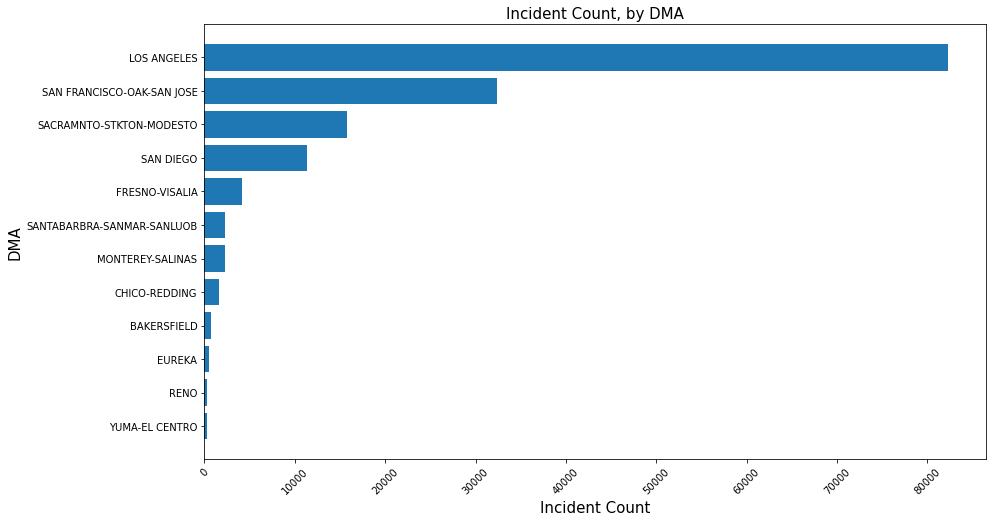

In [32]:
# Which DMAs have the most incidents?

plt.figure(figsize = (14, 8))
plt.barh(incident_count['DMA'], incident_count['Incident Count'],align = 'center')
plt.title('Incident Count, by DMA', fontsize = 15)
plt.ylabel('DMA', fontsize = 15)
plt.xlabel('Incident Count', fontsize = 15)
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.savefig("../visualizations/Incident Count by DMA.jpg", bbox_inches="tight", dpi=100);
# LA has by far the most incidents.  But what about incidents vs DMA population?

In [33]:
dma_percents = pd.DataFrame(df['DMA'].value_counts(normalize = True)).rename(columns = {'DMA': '% of Incidents'}).sort_values(by = '% of Incidents', ascending = False)
dfi.export(dma_percents, "../visualizations/% of Incidents DataFrame.jpg")

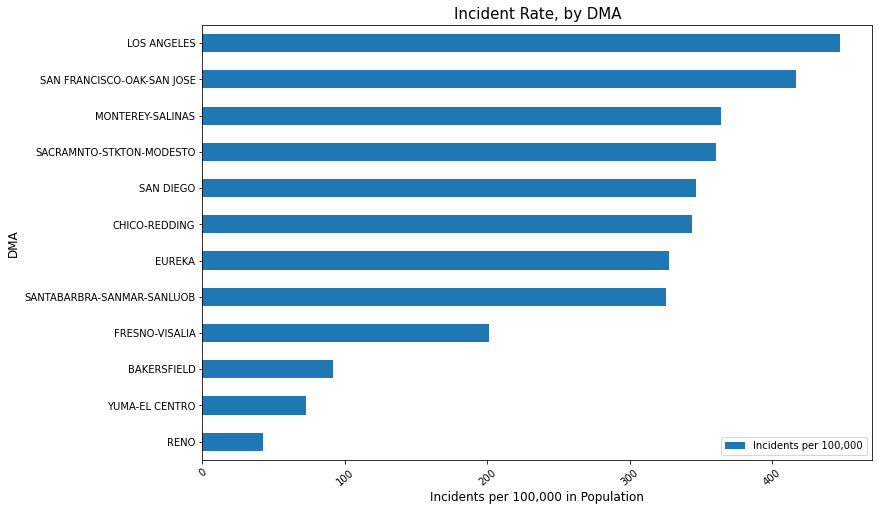

In [34]:
# Incident Rate 
incident_rate[['DMA', 'Incidents per 100,000']].set_index('DMA').sort_values(by = 'Incidents per 100,000').plot(kind = 'barh', figsize = (12,8))

plt.xticks(rotation = 40)
plt.title('Incident Rate, by DMA', fontsize = 15)
plt.ylabel('DMA', fontsize = 12)
plt.xlabel('Incidents per 100,000 in Population', fontsize = 12)
plt.savefig("../visualizations/Incident Rate by DMA.jpg", bbox_inches="tight", dpi=100);

# You're advertising to the whole area.  For efficiency in Customer Acquisition Cost, LA vs Bay Area not as obvious as Total Incidents visual above.

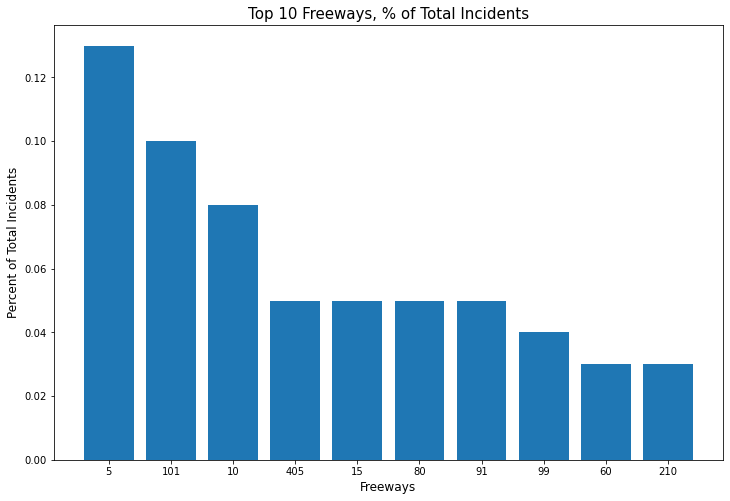

In [35]:
# What freeways have the most incidents?  
freeways = pd.DataFrame(df['Freeway Number'].value_counts(normalize = True)[:10])
freeways = freeways.reset_index().rename(columns = {'index': 'Highway', 
    'Freeway Number': '% of Total Incidents'})

# Get rid of the decimal in highway name.  Dtype is object, so simply indexing works.
freeways['Highway'] = freeways['Highway'].map(lambda x: x[:-2])
freeways['% of Total Incidents'] = freeways['% of Total Incidents'].round(2)

plt.figure(figsize = (12, 8))
plt.bar(freeways['Highway'], freeways['% of Total Incidents'],align = 'center')
plt.title('Top 10 Freeways, % of Total Incidents', fontsize = 15)
plt.ylabel('Percent of Total Incidents', fontsize = 12)
plt.xlabel('Freeways', fontsize = 12)
plt.savefig("../visualizations/Top 10 Freeways.jpg", bbox_inches="tight", dpi=100);

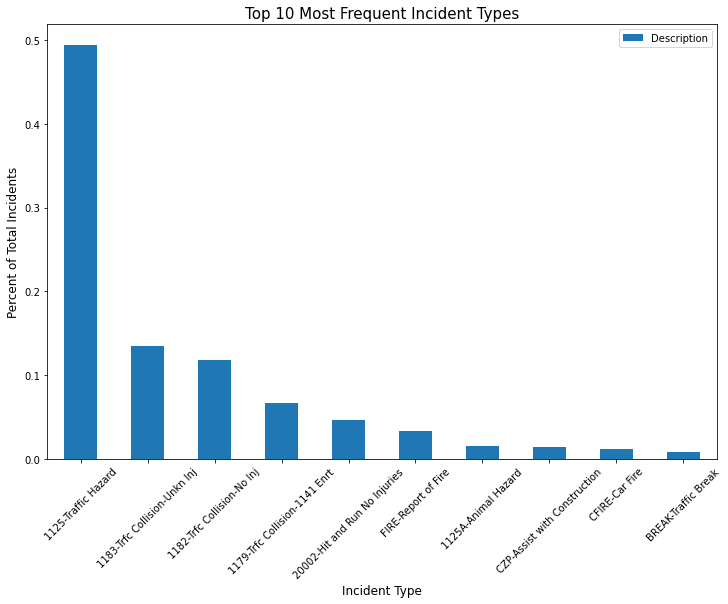

In [36]:
# Type of Incident.  Most types are probably N/A for Walker.  
pd.DataFrame(df['Description'].value_counts(normalize = True, sort = True))[:10].plot(kind = 'bar', figsize = (12,8))

plt.xticks(rotation = 45)
plt.ylabel('Percent of Total Incidents', fontsize = 12)
plt.xlabel('Incident Type', fontsize = 12)
plt.title('Top 10 Most Frequent Incident Types', fontsize = 15)
plt.savefig("../visualizations/Top 10 Incident Types.jpg", bbox_inches="tight", dpi=100);

In [37]:
# Trying to zero in on the types of incidents that might drive revenue for Walker. Guessing collision

collisions = df[df['Description'].str.contains('Collision')].groupby('DMA').count()
collisions = collisions[['Incident ID']].copy()
collisions = collisions.rename(columns = {'Incident ID':'Collision Count'})
collisions

# Merge with total incident count
percent_collisions = pd.merge(left = collisions, right = incident_count, on = 'DMA')
percent_collisions['% Collisions'] = percent_collisions['Collision Count'] / percent_collisions['Incident Count']
percent_collisions = percent_collisions.reset_index().sort_values(by = '% Collisions', ascending = False)
dfi.export(percent_collisions, "../visualizations/Collision %.jpg")
percent_collisions

# LA far and away the most incidents yes, but Bay Area has higher Collision %.  So maybe that's where you focus?

,index,DMA,Collision Count,Incident Count,% Collisions
9,9,SAN FRANCISCO-OAK-SAN JOSE,11385,32401,0.351378
4,4,LOS ANGELES,27217,82327,0.330596
7,7,SACRAMNTO-STKTON-MODESTO,5051,15756,0.320576
3,3,FRESNO-VISALIA,1302,4201,0.309926
0,0,BAKERSFIELD,194,687,0.282387
8,8,SAN DIEGO,3129,11338,0.275975
5,5,MONTEREY-SALINAS,630,2287,0.275470
6,6,RENO,86,322,0.267081
10,10,SANTABARBRA-SANMAR-SANLUOB,571,2291,0.249236
1,1,CHICO-REDDING,339,1606,0.211083


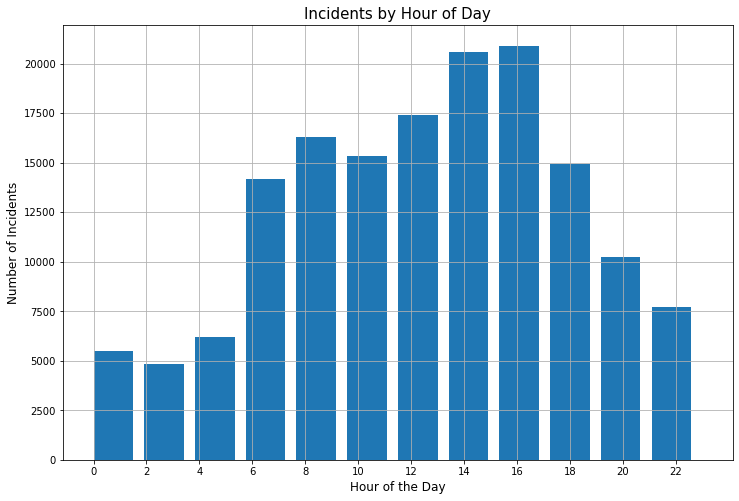

In [38]:
# What time are these incidents occurring?

plt.figure(figsize = (12, 8))
df['hour'].hist(bins = 12, width = 1.5, align = 'mid')
plt.title('Incidents by Hour of Day', fontsize = 15)
plt.ylabel('Number of Incidents', fontsize = 12)
plt.xlabel('Hour of the Day', fontsize = 12)
plt.xticks(np.arange(0, 24, 2));
plt.savefig("../visualizations/Incidents By Hour.jpg", bbox_inches="tight", dpi=100);

# Makes sense the spikes are at rush hour.  

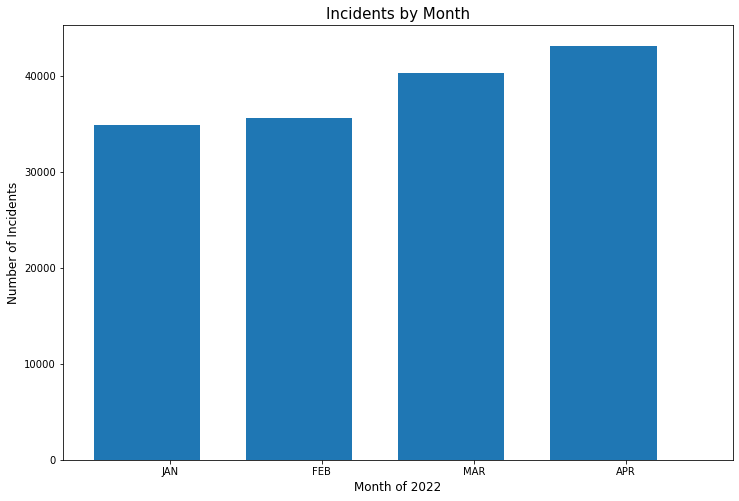

In [39]:
# How does it look JAN-FEB-MAR-APR?  Seasonally, is there any indication of a spike in incidents?

plt.figure(figsize = (12, 8))
plt.hist(df['month'], bins = 4, width = .7, align = 'left')
xticks = ['JAN', 'FEB', 'MAR', 'APR']
plt.xticks(range(1,5),labels =xticks)
plt.title('Incidents by Month', fontsize = 15)
plt.ylabel('Number of Incidents', fontsize = 12)
plt.xlabel('Month of 2022', fontsize = 12)
plt.savefig("../visualizations/Incidents By Month.jpg", bbox_inches="tight", dpi=100);

# Rate of incidents goes up over Q1.  Weather maybe a factor?  Slightly less folks on the road during winter & rain season

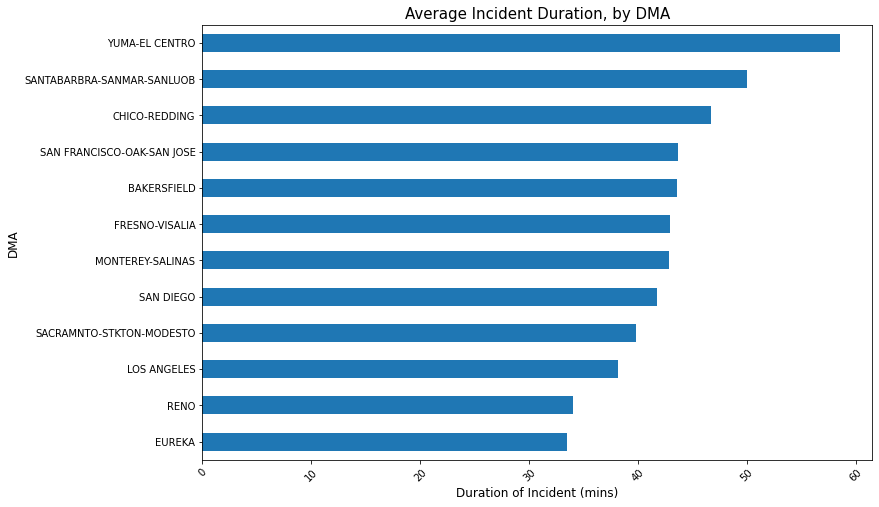

In [40]:
# What's the avg time of an incident, per DMA. 
# Thought is maybe longer incidents have a direct correlation with a potential case for a Walker partner.

plt.figure(figsize = (12, 8))
df.groupby('DMA').mean()['Duration'].sort_values(ascending = True).plot(kind = 'barh')
plt.title('Average Incident Duration, by DMA', fontsize = 15)
plt.ylabel('DMA', fontsize = 12)
plt.xlabel('Duration of Incident (mins)', fontsize = 12)
plt.xticks(rotation = 45)
plt.savefig("../visualizations/Incident Duration Average.jpg", bbox_inches="tight", dpi=100);

In [41]:
df.to_csv('../data/combined_chp_data.csv')